1. Загрузить встроенный в библиотеку sklearn датасет “Ирисы”. Несколькими способами, в том числе графическим, убедиться в отсутствии пропущенных значений.

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


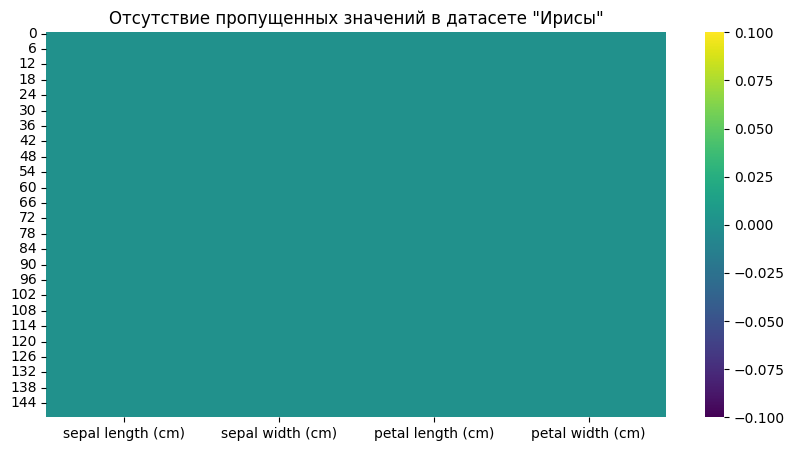

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загружаем датасет
iris_data = load_iris()

# Преобразуем данные в DataFrame
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# Проверка на наличие пропущенных значений
print(iris_df.isnull().sum())

# Визуализация отсутствия пропущенных значений
plt.figure(figsize=(10, 5))
sns.heatmap(iris_df.isnull(), cmap='viridis')
plt.title('Отсутствие пропущенных значений в датасете "Ирисы"')
plt.show()

2. Загрузить встроенный в библиотеку sklearn датасет “Диабет”. Визуализировать распределение четырех любых признаков, входящих в датасет. Сделать содержательные выводы по полученным данным.


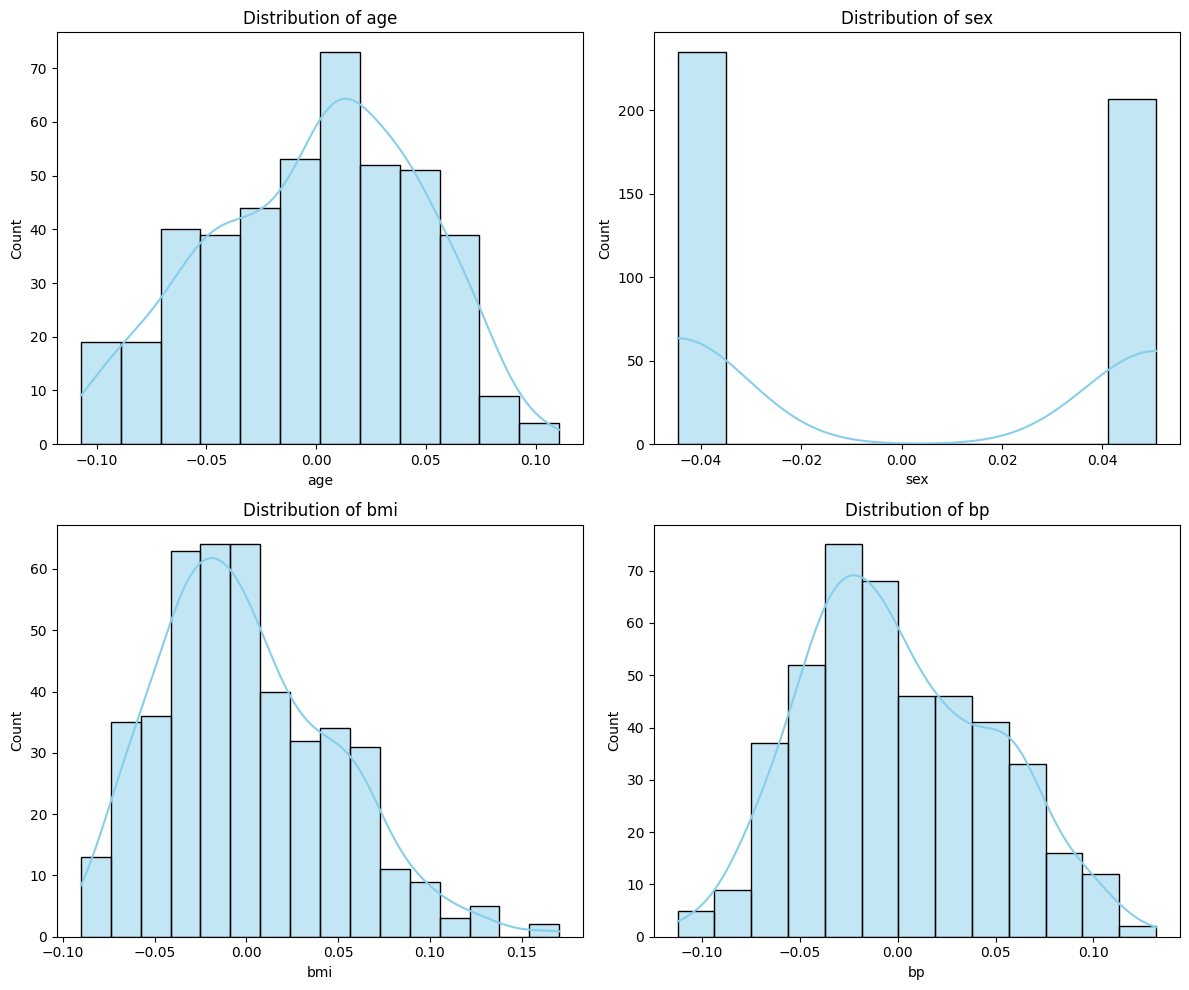

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the diabetes dataset
diabetes_data = load_diabetes()

# Create a DataFrame from the dataset
diabetes_df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)

# Select four features for visualization
selected_features = diabetes_df.columns[:4]

# Visualize the distribution of selected features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, feature in enumerate(selected_features):
    sns.histplot(diabetes_df[feature], ax=axes[i//2, i%2], kde=True, color='skyblue')
    axes[i//2, i%2].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

3. Загрузить встроенный в библиотеку sklearn датасет “Рак груди”. Построить модель бинарной классификации любым методом. Вывести несколько первых теоретических и эмпирических значений целевой переменной. Сделать выводы по полученным результатам.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Загрузка датасета
data = load_breast_cancer()
X = data.data
y = data.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели логистической регрессии
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Предсказания модели
predictions = model.predict(X_test)

# Вывод первых 5 теоретических и эмпирических значений
for i in range(5):
    print(f"Эмпирическое значение: {y_test[i]}, Теоретическое значение: {predictions[i]}")

# Оценка точности модели
accuracy = accuracy_score(y_test, predictions)
print(f"Точность модели: {accuracy}")


Эмпирическое значение: 1, Теоретическое значение: 1
Эмпирическое значение: 0, Теоретическое значение: 0
Эмпирическое значение: 0, Теоретическое значение: 0
Эмпирическое значение: 1, Теоретическое значение: 1
Эмпирическое значение: 1, Теоретическое значение: 1
Точность модели: 0.956140350877193


4. Загрузить встроенный в библиотеку sklearn датасет “Вина”. Построить линейную модель обучения с учителем, вывести и проинтерпретировать коэффициенты линейной модели. Коэффициенты должны выводиться вместе с названием соответствующего признака

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

# Загрузка датасета
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Вывод коэффициентов модели
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                              Coefficient
alcohol                         -0.109280
malic_acid                       0.043350
ash                             -0.204973
alcalinity_of_ash                0.044028
magnesium                        0.000038
total_phenols                    0.152212
flavanoids                      -0.353372
nonflavanoid_phenols            -0.320201
proanthocyanins                  0.017596
color_intensity                  0.076823
hue                             -0.091345
od280/od315_of_diluted_wines    -0.281543
proline                         -0.000697


5. Загрузить встроенный в библиотеку sklearn датасет “Калифорния”. Построить модель регрессии любым методом. Оптимизировать гиперпараметры модели при помощи поиска по сетке. Сделать выводы.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Загрузка датасета
data = fetch_california_housing()
X = data.data
y = data.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели случайного леса
rf = RandomForestRegressor(random_state=42)

# Параметры для поиска по сетке
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
}

# Поиск по сетке с кросс-валидацией
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Лучшие параметры и модель
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Предсказания лучшей модели
predictions = best_rf.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Лучшие параметры: {best_params}")
print(f"Среднеквадратичная ошибка (MSE): {mse}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Лучшие параметры: {'max_depth': 20, 'n_estimators': 200}
Среднеквадратичная ошибка (MSE): 0.2545922861286096
Корень из среднеквадратичной ошибки (RMSE): 0.5045713885354675


6. Загрузить встроенный в библиотеку sklearn датасет “Ирисы”. Построить модель множественной классификации любым методом. Оценить ее эффективность при помощи кросс-валидации. Сделать выводы.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Загрузка датасета Ирисы
iris = load_iris()
X, y = iris.data, iris.target

# Создание модели логистической регрессии
log_reg = LogisticRegression(max_iter=200)

# Оценка эффективности модели с помощью кросс-валидации
scores = cross_val_score(log_reg, X, y, cv=5)

print(f"Средняя точность модели на кросс-валидации: {np.mean(scores):.2f}")

Средняя точность модели на кросс-валидации: 0.97


7. Загрузить встроенный в библиотеку sklearn датасет “Диабет”. Построить модель регрессии по методу опорных векторов с линейным ядром. Оценить ее эффективность по метрикам  r2, mae, rmse, mape. Сделать выводы о применимости модели.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Загрузка датасета
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение модели методом опорных векторов с линейным ядром
model = SVR(kernel='linear')
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'R2 score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}%')

R2 score: 0.020339939398460127
Mean Absolute Error: 61.90453309883161
Root Mean Squared Error: 72.0443451148522
Mean Absolute Percentage Error: 56.094604002823175%


8. Загрузить встроенный в библиотеку sklearn датасет “Рак груди”. Построить модель бинарной линейной классификации. Задать значения аргументов конструктора объекта модели, отличающиеся от значений по умолчанию. Пояснить смысл каждого аргумента

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a binary linear classification model with Logistic Regression
# Setting different values for the 'C' parameter and using 'liblinear' solver
model = LogisticRegression(C=0.5, solver='liblinear')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of the model: {accuracy}')

Accuracy of the model: 0.956140350877193


9. Загрузить встроенный в библиотеку sklearn датасет “Вина”. Построить модель множественной классификации по методу опорных векторов с полиномиальным ядром. Оценить ее эффективность по метрикам accuracy, precision, recall, f1. Сделать выводы о применимости модели.

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the wine dataset
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Support Vector Classification model with polynomial kernel
svm = SVC(kernel='poly')

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8333333333333334
Precision: 0.8717348927875244
Recall: 0.8333333333333334
F1 Score: 0.794334146058284


10. Загрузить встроенный в библиотеку sklearn датасет “Калифорния”. Построить модель регрессии с регуляризацией. Задать значения аргументов конструктора объекта модели, отличающиеся от значений по умолчанию. Пояснить смысл каждого аргумента.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
california_data = fetch_california_housing()
X = california_data.data
y = california_data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a regression model with Ridge regularization
# Setting different values for the 'alpha' parameter
model = Ridge(alpha=0.1, solver='cholesky', tol=0.001)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.5558827543113783


Перцептрон — это тип искусственной нейронной сети, который представляет собой самую простую форму линейного классификатора. Проще говоря, перцептрон принимает входные данные, производит их взвешивание, суммирует и затем пропускает через функцию активации для получения результата.

Вот как это работает шаг за шагом:

Входные данные (или признаки): Это числа, которые описывают объект, который мы хотим классифицировать. Например, если мы хотим определить, является ли изображение фотографией собаки, входными данными могут быть пиксели этого изображения.

Веса: Каждому входному признаку присваивается вес, который представляет его важность. В начале обучения веса обычно инициализируются случайным образом.

Сумматор: Входные данные умножаются на соответствующие веса и суммируются вместе. Это можно представить как взвешенную сумму:
∑
(
вход
×
вес
)
∑(вход×вес).

Функция активации: Полученная сумма затем пропускается через функцию активации, которая определяет, активировать ли нейрон. Простейшая функция активации — это пороговая функция, которая активирует нейрон, если сумма превышает определенный порог.

Выход: Если нейрон активирован, он выдает один результат (например, 1), если нет — другой (например, 0). Это может означать, например, "да, это собака" или "нет, это не собака".

Перцептрон обучается путем корректировки весов на основе ошибок, которые он делает при классификации входных данных. Этот процесс повторяется много раз, и веса постепенно корректируются таким образом, чтобы перцептрон мог правильно классифицировать новые примеры.

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка набора данных ирисов
iris = load_iris()
X, y = iris.data, iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение перцептрона
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = perceptron.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность перцептрона: {accuracy:.2f}')


Точность перцептрона: 0.63


Метод опорных векторов (Support Vector Machine, SVM) - это алгоритм машинного обучения, который используется для задач классификации и регрессии. Основная идея состоит в том, что SVM строит оптимальную разделяющую гиперплоскость между различными классами данных таким образом, чтобы максимизировать расстояние до ближайших точек каждого класса, которые называются опорными векторами. Это помогает обеспечить хорошее разделение классов и хорошую обобщающую способность модели. SVM часто используется в задачах классификации данных, особенно в случаях, когда данные линейно неразделимы.

Метод опорных векторов (SVM, от англ. Support Vector Machines) — это мощный инструмент машинного обучения для классификации данных. Вот простое объяснение того, как он работает:

Разделение данных: Представьте, что у вас есть группа красных и синих точек на листе бумаги, и вы хотите провести линию, которая их разделяет. SVM ищет лучшую линию (или гиперплоскость в многомерном пространстве), которая делит эти точки на две группы.

Опорные векторы: Эта линия выбирается таким образом, чтобы она была как можно дальше от ближайших точек каждой группы. Эти ближайшие точки называются опорными векторами, потому что они как бы "поддерживают" линию разделения.

Максимизация зазора: SVM стремится максимизировать расстояние (или зазор) между этой линией и опорными векторами. Чем больше зазор, тем лучше модель сможет обобщать данные и правильно классифицировать новые примеры.

Функция ядра: Иногда данные не могут быть разделены линейно. В таких случаях SVM использует функции ядра, чтобы преобразовать данные в более высокое измерение, где они могут быть разделены линией. Это похоже на добавление третьего измерения к листу бумаги, чтобы поднять некоторые точки вверх или вниз и найти плоскость, которая их разделяет.

Классификация: После того как модель обучена, она может классифицировать новые данные, определяя, с какой стороны от линии (или гиперплоскости) они находятся.

Это упрощенное объяснение, но оно передает основную идею метода опорных векторов. Если вам нужно более подробное объяснение или примеры кода, я готов помочь!

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Загрузка набора данных ирисов
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Стандартизация признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание модели SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Предсказание результатов на тестовой выборке
predictions = model.predict(X_test)

# Оценка модели
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



 Дерево решений - это модель машинного обучения, которая принимает на вход данные и делает последовательные выборы на основе их признаков, чтобы прийти к окончательному решению. Каждое разделение в дереве решений происходит на основе определенного признака, который помогает разделить данные на более однородные группы. Цель дерева решений - предсказывать значение целевой переменной на основе входных признаков. Дерево решений можно представить как серию "если-то" решений, схожих с древовидной структурой, где каждый узел представляет условие, а каждое ответвление - возможный результат этого условия.

In [3]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Загрузка набора данных ирисов
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание модели дерева решений
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Предсказание результатов на тестовой выборке
predictions = tree_model.predict(X_test)

# Оценка модели
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



k-ближайших соседей (k-NN) - это простой алгоритм машинного обучения, который используется для классификации или регрессии данных. Он работает по следующему принципу: для того чтобы присвоить метку новому объекту, он анализирует k ближайших объектов в обучающем наборе данных с помощью простого расчета расстояния. Затем он присваивает новому объекту класс (или значение) той же метки, которой принадлежит большинство (или среднее) из k его ближайших соседей. Проще говоря, объекту присваивается метка на основе меток его ближайших соседей.

In [4]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Загрузка набора данных ирисов
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание модели k-NN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Предсказание результатов на тестовой выборке
predictions = knn_model.predict(X_test)

# Оценка модели
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Наивная байесовская модель работает следующим образом:
1. Собираются данные для обучения модели, которые включают в себя признаки объектов и их соответствующие классы.
2. Для каждого класса вычисляются вероятности появления каждого признака в объектах этого класса.
3. При поступлении нового объекта модель рассчитывает вероятность принадлежности к каждому классу на основе его признаков.
4. Определяется класс, к которому объект имеет наивысшую вероятность принадлежности.

Наивное предположение модели состоит в том, что признаки объекта независимы друг от друга - хотя на практике это не всегда так. Наивная байесовская модель быстро обучается и хорошо подходит для задач классификации текста, но может не справляться с более сложными зависимостями между признаками.

In [5]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Загрузка набора данных ирисов
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание модели наивного байеса
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Предсказание результатов на тестовой выборке
predictions = nb_model.predict(X_test)

# Оценка модели
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

